<a href="https://colab.research.google.com/github/Bone-Age-Maisha/paper_1/blob/main/Thesis_9.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import numpy as np
import cv2
import os
import pandas as pd

In [ ]:
import pandas as pd
train_dir = '/content/drive/MyDrive/boneage-training-dataset'
df = pd.read_csv('/content/drive/MyDrive/boneage-training-dataset.csv')

In [ ]:
!nvidia-smi

Fri Feb 10 06:32:01 2023       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 510.47.03    Driver Version: 510.47.03    CUDA Version: 11.6     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   36C    P0    27W /  70W |      0MiB / 15360MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [ ]:
!nvidia-smi

Fri Feb 10 06:32:03 2023       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 510.47.03    Driver Version: 510.47.03    CUDA Version: 11.6     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   36C    P0    27W /  70W |      0MiB / 15360MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [ ]:
import os
age_df = df 
age_df['path'] = age_df['id'].map(lambda x: os.path.join(train_dir,'{}.png'.format(x)))
#age_df['exists'] = age_df['path'].map(os.path.exists)

In [ ]:


age1=age_df

In [ ]:

age1

,id,boneage,male,path
0,1377,180,False,/content/drive/MyDrive/boneage-training-datase...
1,1378,12,False,/content/drive/MyDrive/boneage-training-datase...
2,1379,94,False,/content/drive/MyDrive/boneage-training-datase...
3,1380,120,True,/content/drive/MyDrive/boneage-training-datase...
4,1381,82,False,/content/drive/MyDrive/boneage-training-datase...
...,...,...,...,...
12606,15605,50,False,/content/drive/MyDrive/boneage-training-datase...
12607,15606,113,False,/content/drive/MyDrive/boneage-training-datase...
12608,15608,55,False,/content/drive/MyDrive/boneage-training-datase...
12609,15609,150,True,/content/drive/MyDrive/boneage-training-datase...


In [ ]:
ag=age1.boneage.unique()
ag.shape

(160,)

In [ ]:





age1.drop(df[(age1['male'] == False)].index, inplace=True)

In [ ]:
age1

,id,boneage,male,path
3,1380,120,True,/content/drive/MyDrive/boneage-training-datase...
5,1382,138,True,/content/drive/MyDrive/boneage-training-datase...
6,1383,150,True,/content/drive/MyDrive/boneage-training-datase...
7,1384,156,True,/content/drive/MyDrive/boneage-training-datase...
8,1385,36,True,/content/drive/MyDrive/boneage-training-datase...
...,...,...,...,...
12599,15597,192,True,/content/drive/MyDrive/boneage-training-datase...
12601,15599,36,True,/content/drive/MyDrive/boneage-training-datase...
12605,15604,168,True,/content/drive/MyDrive/boneage-training-datase...
12609,15609,150,True,/content/drive/MyDrive/boneage-training-datase...


In [ ]:
ag=age1.boneage.unique()
ag.shape

(131,)

In [ ]:
age1['boneage'].value_counts()

168    738
156    725
150    595
162    491
138    428
      ... 
133      1
33       1
14       1
130      1
81       1
Name: boneage, Length: 131, dtype: int64

In [ ]:
points=age1.boneage.unique()

In [ ]:

print(points.shape)
points

(131,)


array([120, 138, 150, 156,  36, 180,  57, 126, 149,  78, 162,  88,  32,
        54, 174,  33, 170, 108, 165,  60,  42,  21, 132,  90, 192,  84,
        96, 216, 100,  72,  48, 139,  24,  69, 186,  13, 135, 146, 189,
        12,  27, 144,  51, 102, 134, 168,  64, 129, 147,  14,  45,  28,
       128, 210, 222,  66, 198, 200, 104,  80,   9, 114, 112, 204, 159,
       154,  58,  67, 116, 101, 124,  56, 130, 158, 136, 228,  38, 164,
       137,  15, 172,  18, 184, 143,  76, 169, 121, 214, 115,  75,  17,
        34, 106, 151, 194, 177,  81, 105, 183, 152, 125, 176, 133, 153,
        82, 141, 173, 196, 160, 118,  20,  62, 212,   1,  10,  63, 163,
        87,  52, 182, 142, 179,  16,  93,  39,  40, 206,  37,  30, 161,
        94])

In [ ]:
import numpy as np
point=[]
for i in range (131):
  if((age1['boneage'].value_counts()[points[i]])<3):
    point.append(points[i])
  #print(df['boneage'].value_counts()[points[i]])
point=np.asarray(point)

In [ ]:

print(point.shape)
point

(63,)


array([149,  88,  33, 139,  13,  64, 129,  14, 128, 222, 200, 104,  80,
       112,  67, 116, 101,  56, 130, 136,  38, 137, 172, 143,  76, 169,
       121, 214, 115,  17, 151, 194, 177,  81, 105, 152, 125, 133, 141,
       173, 196, 160, 118,  20,  62, 212,   1,  10,  63, 163,  87,  52,
       182, 142, 179,  16,  93,  40, 206,  37,  30, 161,  94])

In [ ]:
for t in range(3):
  for i in range(63):
    x=df.id[df.boneage == point[i]].tolist()[0]
    y=df.boneage[df.boneage == point[i]].tolist()[0]
    m=df.male[df.boneage == point[i]].tolist()[0]
    z=df.path[df.boneage== point[i]].tolist()[0]
    #y=df['boneage']
    #m=df['male']
    new_row = {'id': x, 'boneage':y, 'male':m , 'path':z}
    age1 = age1.append(new_row, ignore_index=True)

In [ ]:

age1

,id,boneage,male,path
0,1380,120,True,/content/drive/MyDrive/boneage-training-datase...
1,1382,138,True,/content/drive/MyDrive/boneage-training-datase...
2,1383,150,True,/content/drive/MyDrive/boneage-training-datase...
3,1384,156,True,/content/drive/MyDrive/boneage-training-datase...
4,1385,36,True,/content/drive/MyDrive/boneage-training-datase...
...,...,...,...,...
7017,10474,206,True,/content/drive/MyDrive/boneage-training-datase...
7018,11355,37,True,/content/drive/MyDrive/boneage-training-datase...
7019,12027,30,True,/content/drive/MyDrive/boneage-training-datase...
7020,12566,161,True,/content/drive/MyDrive/boneage-training-datase...


In [ ]:
from sklearn.model_selection import train_test_split
train_test1, valid1 = train_test_split(age1, 
                                   test_size = 0.15, 
                                   random_state = 2018,
                                   stratify = age1['boneage'])
#print('train', raw_train_df.shape[0], 'validation', valid_df.shape[0])
train1, test1 = train_test_split(train_test1, 
                                   test_size = 0.25, 
                                   random_state = 2018,
                                   stratify = train_test1['boneage'])
print('train', train1.shape[0], 'validation', valid1.shape[0],test1.shape[0])

train 4476 validation 1054 1492


In [ ]:
from keras.preprocessing.image import ImageDataGenerator
IMG_SIZE = (256,256)
core_idg = ImageDataGenerator(rotation_range=20,width_shift_range=0.15,height_shift_range=0.15,zoom_range=0.2,horizontal_flip=True)

In [ ]:
#from keras.preprocessing.image import ImageDataGenerator
#IMG_SIZE = (500,500)
#core_idg = ImageDataGenerator(rotation_range=20,width_shift_range=0.15,height_shift_range=0.15,zoom_range=0.2,horizontal_flip=True)

In [ ]:
def flow_from_dataframe(img_data_gen, in_df, path_col, y_col, **dflow_args):
    base_dir = os.path.dirname(in_df[path_col].values[0])
    print('## Ignore next message from keras, values are replaced anyways')
    df_gen = img_data_gen.flow_from_directory(base_dir, 
                                     class_mode = 'sparse',
                                    **dflow_args)
    df_gen.filenames = in_df[path_col].values
    df_gen.filepaths.extend(df_gen.filenames)
    df_gen.classes = np.stack(in_df[y_col].values)
    df_gen.samples = in_df.shape[0]
    df_gen.n = in_df.shape[0]
    df_gen._set_index_array()
    df_gen.directory = '' 
    gen=np.ones(df_gen.samples)
    print('Reinserting dataframe: {} images'.format(in_df.shape[0]))
    #print(df_gen.samples)
    #yield (df_gen,gen)
    return df_gen

In [ ]:
train1_gen = flow_from_dataframe( core_idg, train1, 
                             path_col = 'path',
                            y_col = 'boneage', 
                            target_size = IMG_SIZE,
                             color_mode = 'rgb',
                            batch_size = 4476)

## Ignore next message from keras, values are replaced anyways
Found 0 images belonging to 0 classes.
Reinserting dataframe: 4476 images


In [ ]:
valid1_gen = flow_from_dataframe(core_idg, valid1, 
                             path_col = 'path',
                            y_col = 'boneage', 
                            target_size = IMG_SIZE,
                             color_mode = 'rgb',
                            batch_size = 1054) 

## Ignore next message from keras, values are replaced anyways
Found 0 images belonging to 0 classes.
Reinserting dataframe: 1054 images


In [ ]:

testcore_idg = ImageDataGenerator(rotation_range=20,width_shift_range=0.15,height_shift_range=0.15,zoom_range=0.2,horizontal_flip=True)

In [ ]:
test1_gen = flow_from_dataframe(testcore_idg, 
                              test1, 
                             path_col = 'path',
                            y_col = 'boneage', 
                            target_size = IMG_SIZE,
                             color_mode = 'rgb',
                            batch_size = 1492)

## Ignore next message from keras, values are replaced anyways
Found 0 images belonging to 0 classes.
Reinserting dataframe: 1492 images


In [ ]:
train1_X, train1_Y = next(train1_gen)

In [ ]:
train1_X.shape

(4476, 256, 256, 3)

In [ ]:
valid1_X, valid1_Y = next(valid1_gen)

In [ ]:
valid1_X.shape

(1054, 256, 256, 3)

In [ ]:
test1_X, test1_Y = next(test1_gen)

In [ ]:

test1_X.shape

(1492, 256, 256, 3)

In [ ]:
import pandas as pd
train_dir = '/content/drive/MyDrive/boneage-training-dataset'
df = pd.read_csv('/content/drive/MyDrive/boneage-training-dataset.csv')

In [ ]:
import os
age_df = df 
age_df['path'] = age_df['id'].map(lambda x: os.path.join(train_dir,
                                                         '{}.png'.format(x)))
age_df['exists'] = age_df['path'].map(os.path.exists)

In [ ]:
age0=age_df

In [ ]:
age0

,id,boneage,male,path,exists
0,1377,180,False,/content/drive/MyDrive/boneage-training-datase...,True
1,1378,12,False,/content/drive/MyDrive/boneage-training-datase...,True
2,1379,94,False,/content/drive/MyDrive/boneage-training-datase...,True
3,1380,120,True,/content/drive/MyDrive/boneage-training-datase...,True
4,1381,82,False,/content/drive/MyDrive/boneage-training-datase...,True
...,...,...,...,...,...
12606,15605,50,False,/content/drive/MyDrive/boneage-training-datase...,True
12607,15606,113,False,/content/drive/MyDrive/boneage-training-datase...,True
12608,15608,55,False,/content/drive/MyDrive/boneage-training-datase...,True
12609,15609,150,True,/content/drive/MyDrive/boneage-training-datase...,True


In [ ]:
ag=age0.boneage.unique()
ag.shape

(160,)

In [ ]:
age0.drop(df[(age0['male'] == True)].index, inplace=True)

In [ ]:
age0

,id,boneage,male,path,exists
0,1377,180,False,/content/drive/MyDrive/boneage-training-datase...,True
1,1378,12,False,/content/drive/MyDrive/boneage-training-datase...,True
2,1379,94,False,/content/drive/MyDrive/boneage-training-datase...,True
4,1381,82,False,/content/drive/MyDrive/boneage-training-datase...,True
10,1388,126,False,/content/drive/MyDrive/boneage-training-datase...,True
...,...,...,...,...,...
12603,15602,82,False,/content/drive/MyDrive/boneage-training-datase...,True
12604,15603,106,False,/content/drive/MyDrive/boneage-training-datase...,True
12606,15605,50,False,/content/drive/MyDrive/boneage-training-datase...,True
12607,15606,113,False,/content/drive/MyDrive/boneage-training-datase...,True


In [ ]:
ag=age0.boneage.unique()
ag.shape

(110,)

In [ ]:
age0['boneage'].value_counts()

132    689
120    635
144    542
94     490
106    474
      ... 
121      1
139      1
49       1
74       1
43       1
Name: boneage, Length: 110, dtype: int64

In [ ]:
points=age0.boneage.unique()

In [ ]:
print(points.shape)
points

(110,)


array([180,  12,  94,  82, 126, 132, 120, 188,   4,  36,  24,  60, 159,
       106,  30,  33, 156,  88, 162, 144,  27, 113, 136,  42, 150,  69,
        50,  21,  84, 138, 140, 100, 168, 174,  90, 192,  39, 165, 104,
        18,  86, 153, 110,  55,  54, 186,  64, 109, 148,  13, 102, 118,
         9, 139, 111, 123,  29, 210, 117, 108, 169, 166, 130, 112, 137,
       204,  15,  78, 163, 125,  74,  96,  75, 114,  91, 135,  87,  16,
       128, 152,  72,  32, 197, 171, 167, 121, 115, 216,  49,  67, 101,
        10, 147, 164,   6, 160, 183,  76,  48,  70,  46, 198, 107,  81,
        45,  65, 103,  77,  62,  43])

In [ ]:
import numpy as np
point=[]
for i in range (110):
  if((age0['boneage'].value_counts()[points[i]])<3):
    point.append(points[i])
  #print(df['boneage'].value_counts()[points[i]])
point=np.asarray(point)

In [ ]:
print(point.shape)
point

(51,)


array([188,   4, 104,  86, 153, 110, 109, 148,  13, 102, 118,   9, 139,
       111, 123,  29, 210, 117, 108, 169, 166, 130,  78, 163,  74,  91,
       135,  87,  16, 128,  32, 197, 171, 167, 121,  49,  67, 101,  10,
       164,   6, 160, 183, 107,  81,  45,  65, 103,  77,  62,  43])

In [ ]:
for t in range(3):
  for i in range(51):
    x=df.id[df.boneage == point[i]].tolist()[0]
    y=df.boneage[df.boneage == point[i]].tolist()[0]
    m=df.male[df.boneage == point[i]].tolist()[0]
    z=df.path[df.boneage== point[i]].tolist()[0]
    #y=df['boneage']
    #m=df['male']
    new_row = {'id': x, 'boneage':y, 'male':m , 'path':z}
    age0= age0.append(new_row, ignore_index=True)

In [ ]:
age0

,id,boneage,male,path,exists
0,1377,180,False,/content/drive/MyDrive/boneage-training-datase...,1.0
1,1378,12,False,/content/drive/MyDrive/boneage-training-datase...,1.0
2,1379,94,False,/content/drive/MyDrive/boneage-training-datase...,1.0
3,1381,82,False,/content/drive/MyDrive/boneage-training-datase...,1.0
4,1388,126,False,/content/drive/MyDrive/boneage-training-datase...,1.0
...,...,...,...,...,...
5926,11112,65,False,/content/drive/MyDrive/boneage-training-datase...,NaN
5927,12621,103,False,/content/drive/MyDrive/boneage-training-datase...,NaN
5928,12799,77,False,/content/drive/MyDrive/boneage-training-datase...,NaN
5929,13097,62,False,/content/drive/MyDrive/boneage-training-datase...,NaN


In [ ]:
from sklearn.model_selection import train_test_split
train_test0, valid0 = train_test_split(age0, 
                                   test_size = 0.2, 
                                   random_state = 2018,
                                   stratify = age0['boneage'])
#print('train', raw_train_df.shape[0], 'validation', valid_df.shape[0])
train0, test0 = train_test_split(train_test0, 
                                   test_size = 0.3, 
                                   random_state = 2018,
                                   stratify = train_test0['boneage'])
print('train', train0.shape[0], 'validation', valid0.shape[0],test0.shape[0])

train 3320 validation 1187 1424


In [ ]:
train0_gen = flow_from_dataframe( core_idg, train0, 
                             path_col = 'path',
                            y_col = 'boneage', 
                            target_size = IMG_SIZE,
                             color_mode = 'rgb',
                            batch_size = 3320)

## Ignore next message from keras, values are replaced anyways
Found 0 images belonging to 0 classes.
Reinserting dataframe: 3320 images


In [ ]:
valid0_gen = flow_from_dataframe(core_idg, valid0, 
                             path_col = 'path',
                            y_col = 'boneage', 
                            target_size = IMG_SIZE,
                             color_mode = 'rgb',
                            batch_size = 1187) 

## Ignore next message from keras, values are replaced anyways
Found 0 images belonging to 0 classes.
Reinserting dataframe: 1187 images


In [ ]:

testcore_idg = ImageDataGenerator(rotation_range=20,width_shift_range=0.15,height_shift_range=0.15,zoom_range=0.2,horizontal_flip=True)

In [ ]:
test0_gen = flow_from_dataframe(testcore_idg, 
                              test0, 
                             path_col = 'path',
                            y_col = 'boneage', 
                            target_size = IMG_SIZE,
                             color_mode = 'rgb',
                            batch_size = 1424)

## Ignore next message from keras, values are replaced anyways
Found 0 images belonging to 0 classes.
Reinserting dataframe: 1424 images


In [ ]:
train0_X, train0_Y = next(train0_gen)

In [ ]:
train0_X.shape

(3320, 256, 256, 3)

In [ ]:
train_x=[]
train_y=[]
train_gen=[]
i=0
for k in range(332):
  for j in range(10):
    train_x.append(train1_X[i])
    train_y.append(train1_Y[i])
    train_gen.append(1)
    train_x.append(train0_X[i])
    train_y.append(train0_Y[i])
    train_gen.append(0)
    i=i+1

del train0_X
del train0_Y
i=3320
for k in range(1156):
  train_x.append(train1_X[i])
  train_y.append(train1_Y[i])
  train_gen.append(1)
  i=i+1
del train1_X
del train1_Y

In [ ]:
train_x=np.asarray(train_x)
train_x=train_x/255
train_y=np.asarray(train_y)
train_gen=np.asarray(train_gen)

In [ ]:
valid0_X, valid0_Y = next(valid0_gen)

In [ ]:
valid0_X.shape

(1187, 256, 256, 3)

In [ ]:
valid_x=[]
valid_y=[]
valid_gen=[]
i=0
for k in range(62):
  for j in range(17):
    valid_x.append(valid1_X[i])
    valid_y.append(valid1_Y[i])
    valid_gen.append(1)
    valid_x.append(valid0_X[i])
    valid_y.append(valid0_Y[i])
    valid_gen.append(0)
    i=i+1
del valid1_X
del valid1_Y
i=1054
for k in range(133):
  valid_x.append(valid0_X[i])
  valid_y.append(valid0_Y[i])
  valid_gen.append(0)
  i=i+1
del valid0_X
del valid0_Y

In [ ]:
valid_x=np.asarray(valid_x)
valid_x=valid_x/255
valid_y=np.asarray(valid_y)
valid_gen=np.asarray(valid_gen)

In [ ]:
test0_X, test0_Y = next(test0_gen)

In [ ]:
test0_X.shape

(1424, 256, 256, 3)

In [ ]:
test_x=[]
test_y=[]
test_gen=[]
i=0
for k in range(89):
  for j in range(16):
    test_x.append(test1_X[i])
    test_y.append(test1_Y[i])
    test_gen.append(1)
    test_x.append(test0_X[i])
    test_y.append(test0_Y[i])
    test_gen.append(0)
    i=i+1

del test0_X
del test0_Y
i=1424
for j in range(68):
  test_x.append(test1_X[i])
  test_y.append(test1_Y[i])
  test_gen.append(1)
  i=i+1
del test1_X
del test1_Y

In [ ]:
test_x=np.asarray(test_x)
test_x=test_x/255
test_y=np.asarray(test_y)
test_gen=np.asarray(test_gen)

In [ ]:
from tensorflow.keras.applications.resnet50 import ResNet50
from keras.applications.vgg19 import VGG19
from keras.applications.inception_v3 import InceptionV3
from keras.applications.xception import Xception
from keras.preprocessing import image
from keras.models import Model, load_model
from keras.layers import Flatten, Dense, Input, Reshape, Lambda,Conv2D
from tensorflow.keras import regularizers
import tensorflow as tf
from keras import backend as K
import pickle
import numpy as np
import matplotlib.pyplot as plt
import keras
#from func_utils import *
import os
#os.environ["CUDA_VISIBLE_DEVICES"]="2"
#os.environ['OMP_NUM_THREADS']='6'
batch_size = 1
epochs = 30

In [ ]:
def conv2d_bn(x,filters,num_row,num_col,padding='same',strides=(1, 1)):
   
    x = keras.layers.Conv2D(filters, (num_row, num_col),padding=padding)(x)
    x = keras.layers.BatchNormalization(axis=3, scale=False)(x)
    x = keras.layers.Activation('relu')(x)
    return x

    #x = conv2d_bn(x, 32, 3, 3, padding='valid') 

In [ ]:
from tensorflow.keras import regularizers
def channel_attention(input_feature):
    kernel_initializer = tf.keras.initializers.variance_scaling()
    bias_initializer = tf.constant_initializer(value=0.0)
    channel = input_feature.get_shape()[-1]
    ratio=8
    avg_pool = tf.reduce_mean(input_feature, axis=[1,2], keepdims=True)
    assert avg_pool.get_shape()[1:] == (1,1,channel)
    avg_pool =Dense(
                                 units=channel//ratio,
                                 activation=tf.nn.relu,
                   kernel_regularizer=regularizers.L2(0.1),
                                 kernel_initializer=kernel_initializer,
                                 bias_initializer=bias_initializer) (avg_pool)
    avg_pool = tf.keras.layers.Dropout(0.2)( avg_pool)
    assert avg_pool.get_shape()[1:] == (1,1,channel//ratio)
    avg_pool = Dense(
                                 units=channel,                             
                                 kernel_initializer=kernel_initializer,
                                 kernel_regularizer=regularizers.L2(0.1),
                                 bias_initializer=bias_initializer)  (avg_pool)  

    assert avg_pool.get_shape()[1:] == (1,1,channel)

    max_pool = tf.reduce_max(input_feature, axis=[1,2], keepdims=True)    
    assert max_pool.get_shape()[1:] == (1,1,channel)
    max_pool = Dense(
                                 units=channel//ratio,
                                  kernel_regularizer=regularizers.L2(0.1),
                                 activation=tf.nn.relu) (max_pool)  

    assert max_pool.get_shape()[1:] == (1,1,channel//ratio)
    max_pool = Dense(kernel_regularizer=regularizers.L2(0.1),
                                 units=channel)  (max_pool)

    assert max_pool.get_shape()[1:] == (1,1,channel)

    scale = tf.keras.activations.sigmoid(avg_pool + max_pool) 
    return input_feature * scale



In [ ]:
def spatial_attention1(input_feature):
    kernel_size = 3
    kernel_initializer = tf.keras.initializers.variance_scaling()

    avg_pool = tf.reduce_mean(input_feature, axis=[3], keepdims=True)
    assert avg_pool.get_shape()[-1] == 1
    max_pool = tf.reduce_max(input_feature, axis=[3], keepdims=True)
    assert max_pool.get_shape()[-1] == 1
    concat = tf.concat([avg_pool,max_pool], 3)
    assert concat.get_shape()[-1] == 2

    concat = Conv2D(
                              filters=1,
                              kernel_size=[kernel_size,kernel_size],
                              strides=[1,1],
                              padding="same",
                              activation=None,
                              kernel_regularizer=regularizers.L2(0.01),
                              kernel_initializer=kernel_initializer,
                              use_bias=False)(concat)
  #concat = tf.keras.layers.Dropout(0.2)( concat)
    assert concat.get_shape()[-1] == 1
    concat = tf.keras.activations.sigmoid(concat)
    
    return input_feature * concat


In [ ]:
def spatial_attention2(input_feature):
    kernel_size = 5
    kernel_initializer = tf.keras.initializers.variance_scaling()

    avg_pool = tf.reduce_mean(input_feature, axis=[3], keepdims=True)
    assert avg_pool.get_shape()[-1] == 1
    max_pool = tf.reduce_max(input_feature, axis=[3], keepdims=True)
    assert max_pool.get_shape()[-1] == 1
    concat = tf.concat([avg_pool,max_pool], 3)
    assert concat.get_shape()[-1] == 2

    concat = Conv2D(
                              filters=1,
                              kernel_size=[kernel_size,kernel_size],
                              strides=[1,1],
                              padding="same",
                              activation=None,
                              kernel_regularizer=regularizers.L2(0.01),
                              kernel_initializer=kernel_initializer,
                              use_bias=False)(concat)
  #concat = tf.keras.layers.Dropout(0.2)( concat)
    assert concat.get_shape()[-1] == 1
    concat = tf.keras.activations.sigmoid(concat)
    
    return input_feature * concat


In [ ]:
def spatial_attention3(input_feature):
    kernel_size = 7
    kernel_initializer = tf.keras.initializers.variance_scaling()

    avg_pool = tf.reduce_mean(input_feature, axis=[3], keepdims=True)
    assert avg_pool.get_shape()[-1] == 1
    max_pool = tf.reduce_max(input_feature, axis=[3], keepdims=True)
    assert max_pool.get_shape()[-1] == 1
    concat = tf.concat([avg_pool,max_pool], 3)
    assert concat.get_shape()[-1] == 2

    concat = Conv2D(
                              filters=1,
                              kernel_size=[kernel_size,kernel_size],
                              strides=[1,1],
                              padding="same",
                              activation=None,
                              kernel_regularizer=regularizers.L2(0.01),
                              kernel_initializer=kernel_initializer,
                              use_bias=False)(concat)
  #concat = tf.keras.layers.Dropout(0.2)( concat)
    assert concat.get_shape()[-1] == 1
    concat = tf.keras.activations.sigmoid(concat)
    
    return input_feature * concat


================================================================================

In [ ]:
base_model = InceptionV3(weights='imagenet', include_top=False)

input = Input(shape=(256,256,3),name='input1')
input_gender = Input(shape=(1,),dtype='float32',name='input2')
output = base_model(input)
gender_embedding=Dense(32)(input_gender)
#gender_embedding=Dense(12)(gender_embedding)
#x = keras.layers.MaxPooling2D(pool_size=(5,5))(output)
#x = keras.layers.Conv2D(512,kernel_size=(3,3))(x)
#x = conv2d_bn(output, 512, 3, 3, padding='valid') 
#x = conv2d_bn(x, 256, 3, 3, padding='valid') 
#x = conv2d_bn(x, 256, 3, 3, padding='valid') 
x=channel_attention(output)
#x=spatial_attention(x)

print (K.int_shape(output))
x = keras.layers.MaxPooling2D(pool_size=(2,2))(x)
print (K.int_shape(x))
x=Flatten()(x)
f = keras.layers.Concatenate(axis=1)([x,gender_embedding])
print (K.int_shape(f)) 
#x = Dense(256, activation='relu')(x)
predictions = Dense(1)(f)
model = Model(inputs=[input,input_gender], outputs=predictions)
Adam=tf.keras.optimizers.Adam(lr=0.0001,beta_1=0.9,beta_2=0.999)
model.compile(optimizer=Adam, loss='mean_absolute_error', metrics=['MAE'])
#model.summary()
from keras.preprocessing.image import ImageDataGenerator
DataGen = ImageDataGenerator(rotation_range=20,width_shift_range=0.15,height_shift_range=0.15,zoom_range=0.2,horizontal_flip=True)
def Generator(x_train,gender_train,y_train,batch_size):
    loopcount = len(y_train)//batch_size
    i=0
    while (True):
        if i>loopcount:
            i=0
        # i=np.random.randint(0,loopcount)
        x_train_batch = x_train[i*batch_size:(i+1)*batch_size,:,:,:]
        x_train_batch = DataAugment(x_train_batch)
        gender_train_batch = gender_train[i*batch_size:(i+1)*batch_size]
        y_train_batch = y_train[i*batch_size:(i+1)*batch_size]
        inputs = [x_train_batch,gender_train_batch]
        target = y_train_batch
        yield (inputs ,target)
        i = i+1
checkpoint =keras.callbacks.ModelCheckpoint(filepath='weights/weights.{epoch:02d}-{val_loss:.2f}.hdf5',save_weights_only=True,period=100)
history = model.fit_generator(DataGen.flow([train_x,train_gen],train_y,batch_size=64),steps_per_epoch=np.ceil(len(train_y)/64),epochs=100,verbose=1,validation_data=([valid_x,valid_gen],valid_y))
#history = model.fit_generator(Generator(x_train,gender_train,y_train,batch_size),steps_per_epoch=np.ceil(len(y_train)/batch_size),epochs=10,verbose=1,validation_data=([x_valid,gender_valid],y_valid))
#history=model.fit([x_train,gender_train],y_train,batch_size=32,epochs=5,verbose=1,validation_data=([x_valid,gender_valid],y_valid), callbacks = [checkpoint])
score = model.evaluate([test_x,test_gen], test_y, batch_size=64)

87910968/87910968 [==============================] - 0s 0us/step


/usr/local/lib/python3.8/dist-packages/keras/optimizers/optimizer_v2/adam.py:110: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


(None, 6, 6, 2048)
(None, 3, 3, 2048)
(None, 18464)


<ipython-input-73-5af9d40f501a>:46: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = model.fit_generator(DataGen.flow([train_x,train_gen],train_y,batch_size=64),steps_per_epoch=np.ceil(len(train_y)/64),epochs=100,verbose=1,validation_data=([valid_x,valid_gen],valid_y))


Epoch 1/100
122/122 [==============================] - 139s 968ms/step - loss: 298.5641 - MAE: 35.7571 - val_loss: 249.1759 - val_MAE: 38.6829
Epoch 2/100
122/122 [==============================] - 108s 882ms/step - loss: 187.9369 - MAE: 15.1164 - val_loss: 156.2570 - val_MAE: 16.3448
Epoch 3/100
122/122 [==============================] - 107s 873ms/step - loss: 129.6753 - MAE: 13.7381 - val_loss: 111.1778 - val_MAE: 16.2509
Epoch 4/100
122/122 [==============================] - 107s 871ms/step - loss: 92.4401 - MAE: 13.1319 - val_loss: 78.1465 - val_MAE: 12.7679
Epoch 5/100
122/122 [==============================] - 107s 872ms/step - loss: 67.3271 - MAE: 12.4274 - val_loss: 58.2592 - val_MAE: 12.7629
Epoch 6/100
122/122 [==============================] - 108s 880ms/step - loss: 50.4493 - MAE: 12.1736 - val_loss: 43.7803 - val_MAE: 11.9934
Epoch 7/100
122/122 [==============================] - 107s 876ms/step - loss: 38.4519 - MAE: 11.7094 - val_loss: 33.7699 - val_MAE: 11.5849
Epoch 8

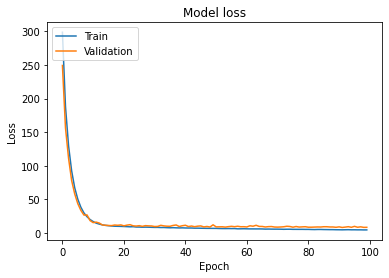

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

In [ ]:
base_model = InceptionV3(weights='imagenet', include_top=False)

input = Input(shape=(256,256,3),name='input1')
input_gender = Input(shape=(1,),dtype='float32',name='input2')
output = base_model(input)
gender_embedding=Dense(32)(input_gender)
#gender_embedding=Dense(12)(gender_embedding)
#x = keras.layers.MaxPooling2D(pool_size=(5,5))(output)
#x = keras.layers.Conv2D(512,kernel_size=(3,3))(x)
#x = conv2d_bn(output, 512, 3, 3, padding='valid') 
#x = conv2d_bn(x, 256, 3, 3, padding='valid') 
#x = conv2d_bn(x, 256, 3, 3, padding='valid') 
#x=channel_attention(x)
x=spatial_attention3(output)

print (K.int_shape(output))
x = keras.layers.MaxPooling2D(pool_size=(2,2))(x)
print (K.int_shape(x))
x=Flatten()(x)
f = keras.layers.Concatenate(axis=1)([x,gender_embedding])
print (K.int_shape(f)) 
#x = Dense(256, activation='relu')(x)
predictions = Dense(1)(f)
model = Model(inputs=[input,input_gender], outputs=predictions)
Adam=tf.keras.optimizers.Adam(lr=0.0001,beta_1=0.9,beta_2=0.999)
model.compile(optimizer=Adam, loss='mean_absolute_error', metrics=['MAE'])
#model.summary()
from keras.preprocessing.image import ImageDataGenerator
DataGen = ImageDataGenerator(rotation_range=20,width_shift_range=0.15,height_shift_range=0.15,zoom_range=0.2,horizontal_flip=True)
def Generator(x_train,gender_train,y_train,batch_size):
    loopcount = len(y_train)//batch_size
    i=0
    while (True):
        if i>loopcount:
            i=0
        # i=np.random.randint(0,loopcount)
        x_train_batch = x_train[i*batch_size:(i+1)*batch_size,:,:,:]
        x_train_batch = DataAugment(x_train_batch)
        gender_train_batch = gender_train[i*batch_size:(i+1)*batch_size]
        y_train_batch = y_train[i*batch_size:(i+1)*batch_size]
        inputs = [x_train_batch,gender_train_batch]
        target = y_train_batch
        yield (inputs ,target)
        i = i+1
checkpoint =keras.callbacks.ModelCheckpoint(filepath='weights/weights.{epoch:02d}-{val_loss:.2f}.hdf5',save_weights_only=True,period=100)
history = model.fit_generator(DataGen.flow([train_x,train_gen],train_y,batch_size=64),steps_per_epoch=np.ceil(len(train_y)/64),epochs=100,verbose=1,validation_data=([valid_x,valid_gen],valid_y))
#history = model.fit_generator(Generator(x_train,gender_train,y_train,batch_size),steps_per_epoch=np.ceil(len(y_train)/batch_size),epochs=10,verbose=1,validation_data=([x_valid,gender_valid],y_valid))
#history=model.fit([x_train,gender_train],y_train,batch_size=32,epochs=5,verbose=1,validation_data=([x_valid,gender_valid],y_valid), callbacks = [checkpoint])
score = model.evaluate([test_x,test_gen], test_y, batch_size=64)

(None, 6, 6, 2048)
(None, 3, 3, 2048)
(None, 18464)


<ipython-input-75-93a65a7ba113>:46: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = model.fit_generator(DataGen.flow([train_x,train_gen],train_y,batch_size=64),steps_per_epoch=np.ceil(len(train_y)/64),epochs=100,verbose=1,validation_data=([valid_x,valid_gen],valid_y))


Epoch 1/100
122/122 [==============================] - 117s 907ms/step - loss: 36.2376 - MAE: 36.2254 - val_loss: 22.3356 - val_MAE: 22.3234
Epoch 2/100
122/122 [==============================] - 104s 851ms/step - loss: 15.5699 - MAE: 15.5577 - val_loss: 16.0092 - val_MAE: 15.9969
Epoch 3/100
122/122 [==============================] - 106s 863ms/step - loss: 14.1706 - MAE: 14.1584 - val_loss: 13.6070 - val_MAE: 13.5948
Epoch 4/100
122/122 [==============================] - 106s 863ms/step - loss: 13.1357 - MAE: 13.1235 - val_loss: 14.5610 - val_MAE: 14.5488
Epoch 5/100
122/122 [==============================] - 104s 849ms/step - loss: 12.8356 - MAE: 12.8234 - val_loss: 11.7547 - val_MAE: 11.7425
Epoch 6/100
122/122 [==============================] - 107s 872ms/step - loss: 12.1886 - MAE: 12.1764 - val_loss: 16.3928 - val_MAE: 16.3806
Epoch 7/100
122/122 [==============================] - 106s 864ms/step - loss: 12.0050 - MAE: 11.9928 - val_loss: 11.9501 - val_MAE: 11.9379
Epoch 8/100
1

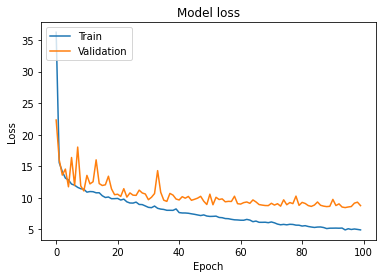

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

In [ ]:
base_model = InceptionV3(weights='imagenet', include_top=False)

input = Input(shape=(256,256,3),name='input1')
input_gender = Input(shape=(1,),dtype='float32',name='input2')
output = base_model(input)
gender_embedding=Dense(32)(input_gender)
#gender_embedding=Dense(12)(gender_embedding)
#x = keras.layers.MaxPooling2D(pool_size=(5,5))(output)
#x = keras.layers.Conv2D(512,kernel_size=(3,3))(x)
#x = conv2d_bn(output, 512, 3, 3, padding='valid') 
sq = keras.layers.GlobalAveragePooling2D()(output)
sq = keras.layers.Reshape((1,1,2048))(sq)
sq = keras.layers.Dense(units=2048,activation="sigmoid")(sq)
block = keras.layers.multiply([output,sq])
#fine Squeeze and Excitation 1

net = keras.layers.add([output,block])
net = keras.layers.BatchNormalization()(net)
net = keras.layers.Activation("relu")(net)
net = keras.layers.MaxPooling2D(pool_size=(2, 2),name="block_1")(net)

print (K.int_shape(output))
x = keras.layers.MaxPooling2D(pool_size=(2,2))(net)
print (K.int_shape(x))
x=Flatten()(x)
f = keras.layers.Concatenate(axis=1)([x,gender_embedding])
print (K.int_shape(f)) 
#x = Dense(256, activation='relu')(x)
predictions = Dense(1)(f)
model = Model(inputs=[input,input_gender], outputs=predictions)
Adam=tf.keras.optimizers.Adam(lr=0.0001,beta_1=0.9,beta_2=0.999)
model.compile(optimizer=Adam, loss='mean_absolute_error', metrics=['MAE'])
model.summary()
from keras.preprocessing.image import ImageDataGenerator
DataGen = ImageDataGenerator(rotation_range=20,width_shift_range=0.15,height_shift_range=0.15,zoom_range=0.2,horizontal_flip=True)
def Generator(x_train,gender_train,y_train,batch_size):
    loopcount = len(y_train)//batch_size
    i=0
    while (True):
        if i>loopcount:
            i=0
        # i=np.random.randint(0,loopcount)
        x_train_batch = x_train[i*batch_size:(i+1)*batch_size,:,:,:]
        x_train_batch = DataAugment(x_train_batch)
        gender_train_batch = gender_train[i*batch_size:(i+1)*batch_size]
        y_train_batch = y_train[i*batch_size:(i+1)*batch_size]
        inputs = [x_train_batch,gender_train_batch]
        target = y_train_batch
        yield (inputs ,target)
        i = i+1
checkpoint =keras.callbacks.ModelCheckpoint(filepath='weights/weights.{epoch:02d}-{val_loss:.2f}.hdf5',save_weights_only=True,period=100)
history = model.fit_generator(DataGen.flow([train_x,train_gen],train_y,batch_size=64),steps_per_epoch=np.ceil(len(train_y)/64),epochs=100,verbose=1,validation_data=([valid_x,valid_gen],valid_y))
#history = model.fit_generator(Generator(x_train,gender_train,y_train,batch_size),steps_per_epoch=np.ceil(len(y_train)/batch_size),epochs=10,verbose=1,validation_data=([x_valid,gender_valid],y_valid))
#history=model.fit([x_train,gender_train],y_train,batch_size=32,epochs=5,verbose=1,validation_data=([x_valid,gender_valid],y_valid), callbacks = [checkpoint])
score = model.evaluate([test_x,test_gen], test_y, batch_size=64)

(None, 6, 6, 2048)
(None, 1, 1, 2048)
(None, 2080)
Model: "model_2"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input1 (InputLayer)            [(None, 256, 256, 3  0           []                               
                                )]                                                                
                                                                                                  
 inception_v3 (Functional)      (None, None, None,   21802784    ['input1[0][0]']                 
                                2048)                                                             
                                                                                                  
 global_average_pooling2d (Glob  (None, 2048)        0           ['inception_v3[0][0]']           
 alAveragePooling2D)                     

<ipython-input-77-1072a752b83d>:52: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = model.fit_generator(DataGen.flow([train_x,train_gen],train_y,batch_size=64),steps_per_epoch=np.ceil(len(train_y)/64),epochs=100,verbose=1,validation_data=([valid_x,valid_gen],valid_y))


Epoch 1/100
122/122 [==============================] - 118s 911ms/step - loss: 32.8310 - MAE: 32.8310 - val_loss: 25.8432 - val_MAE: 25.8432
Epoch 2/100
122/122 [==============================] - 105s 854ms/step - loss: 15.4688 - MAE: 15.4688 - val_loss: 21.8930 - val_MAE: 21.8930
Epoch 3/100
122/122 [==============================] - 106s 867ms/step - loss: 14.0311 - MAE: 14.0311 - val_loss: 33.1732 - val_MAE: 33.1732
Epoch 4/100
122/122 [==============================] - 105s 856ms/step - loss: 13.2086 - MAE: 13.2086 - val_loss: 21.4680 - val_MAE: 21.4680
Epoch 5/100
122/122 [==============================] - 105s 855ms/step - loss: 12.6068 - MAE: 12.6068 - val_loss: 15.1774 - val_MAE: 15.1774
Epoch 6/100
122/122 [==============================] - 105s 856ms/step - loss: 12.1967 - MAE: 12.1967 - val_loss: 12.6945 - val_MAE: 12.6945
Epoch 7/100
122/122 [==============================] - 103s 843ms/step - loss: 11.9509 - MAE: 11.9509 - val_loss: 20.9277 - val_MAE: 20.9277
Epoch 8/100
1

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

In [ ]:
base_model = InceptionV3(weights='imagenet', include_top=False)

input = Input(shape=(256,256,3),name='input1')
input_gender = Input(shape=(1,),dtype='float32',name='input2')
output = base_model(input)
gender_embedding=Dense(32)(input_gender)
#gender_embedding=Dense(12)(gender_embedding)
#x = keras.layers.MaxPooling2D(pool_size=(5,5))(output)
#x = keras.layers.Conv2D(512,kernel_size=(3,3))(x)
#x = conv2d_bn(output, 512, 3, 3, padding='valid') 
#x = conv2d_bn(x, 256, 3, 3, padding='valid') 
#x = conv2d_bn(x, 256, 3, 3, padding='valid') 
x=channel_attention(output)
x=spatial_attention3(x)

print (K.int_shape(output))
x = keras.layers.MaxPooling2D(pool_size=(2,2))(x)
print (K.int_shape(x))
x=Flatten()(x)
f = keras.layers.Concatenate(axis=1)([x,gender_embedding])
print (K.int_shape(f)) 
#x = Dense(256, activation='relu')(x)
predictions = Dense(1)(f)
model = Model(inputs=[input,input_gender], outputs=predictions)
Adam=tf.keras.optimizers.Adam(lr=0.0001,beta_1=0.9,beta_2=0.999)
model.compile(optimizer=Adam, loss='mean_absolute_error', metrics=['MAE'])
#model.summary()
from keras.preprocessing.image import ImageDataGenerator
DataGen = ImageDataGenerator(rotation_range=20,width_shift_range=0.15,height_shift_range=0.15,zoom_range=0.2,horizontal_flip=True)
def Generator(x_train,gender_train,y_train,batch_size):
    loopcount = len(y_train)//batch_size
    i=0
    while (True):
        if i>loopcount:
            i=0
        # i=np.random.randint(0,loopcount)
        x_train_batch = x_train[i*batch_size:(i+1)*batch_size,:,:,:]
        x_train_batch = DataAugment(x_train_batch)
        gender_train_batch = gender_train[i*batch_size:(i+1)*batch_size]
        y_train_batch = y_train[i*batch_size:(i+1)*batch_size]
        inputs = [x_train_batch,gender_train_batch]
        target = y_train_batch
        yield (inputs ,target)
        i = i+1
checkpoint =keras.callbacks.ModelCheckpoint(filepath='weights/weights.{epoch:02d}-{val_loss:.2f}.hdf5',save_weights_only=True,period=100)
history = model.fit_generator(DataGen.flow([train_x,train_gen],train_y,batch_size=64),steps_per_epoch=np.ceil(len(train_y)/64),epochs=100,verbose=1,validation_data=([valid_x,valid_gen],valid_y))
#history = model.fit_generator(Generator(x_train,gender_train,y_train,batch_size),steps_per_epoch=np.ceil(len(y_train)/batch_size),epochs=10,verbose=1,validation_data=([x_valid,gender_valid],y_valid))
#history=model.fit([x_train,gender_train],y_train,batch_size=32,epochs=5,verbose=1,validation_data=([x_valid,gender_valid],y_valid), callbacks = [checkpoint])
score = model.evaluate([test_x,test_gen], test_y, batch_size=64)

87910968/87910968 [==============================] - 3s 0us/step


/usr/local/lib/python3.8/dist-packages/keras/optimizers/optimizer_v2/adam.py:110: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


(None, 6, 6, 2048)
(None, 3, 3, 2048)
(None, 18464)


<ipython-input-72-180efbeb691e>:46: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = model.fit_generator(DataGen.flow([train_x,train_gen],train_y,batch_size=64),steps_per_epoch=np.ceil(len(train_y)/64),epochs=100,verbose=1,validation_data=([valid_x,valid_gen],valid_y))


Epoch 1/100
122/122 [==============================] - 141s 992ms/step - loss: 301.4113 - MAE: 39.2780 - val_loss: 226.2802 - val_MAE: 16.4377
Epoch 2/100
122/122 [==============================] - 111s 905ms/step - loss: 187.5711 - MAE: 15.4045 - val_loss: 154.4473 - val_MAE: 15.0357
Epoch 3/100
122/122 [==============================] - 110s 899ms/step - loss: 129.6789 - MAE: 14.0751 - val_loss: 107.6811 - val_MAE: 13.0703
Epoch 4/100
122/122 [==============================] - 113s 923ms/step - loss: 91.9144 - MAE: 12.9231 - val_loss: 79.4876 - val_MAE: 14.3110
Epoch 5/100
122/122 [==============================] - 113s 922ms/step - loss: 67.3480 - MAE: 12.6359 - val_loss: 57.2564 - val_MAE: 11.9173
Epoch 6/100
122/122 [==============================] - 112s 910ms/step - loss: 50.4599 - MAE: 12.2864 - val_loss: 43.0847 - val_MAE: 11.3931
Epoch 7/100
122/122 [==============================] - 110s 897ms/step - loss: 38.4870 - MAE: 11.8169 - val_loss: 33.8584 - val_MAE: 11.7253
Epoch 8

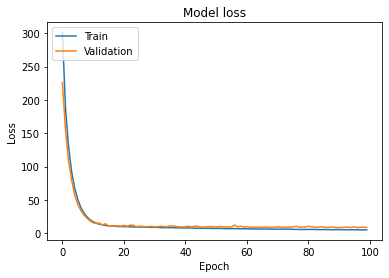

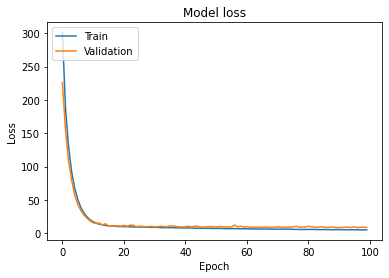

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

In [ ]:
base_model = InceptionV3(weights='imagenet', include_top=False)

input = Input(shape=(256,256,3),name='input1')
input_gender = Input(shape=(1,),dtype='float32',name='input2')
output = base_model(input)
gender_embedding=Dense(32)(input_gender)
#gender_embedding=Dense(12)(gender_embedding)
#x = keras.layers.MaxPooling2D(pool_size=(5,5))(output)
#x = keras.layers.Conv2D(512,kernel_size=(3,3))(x)
#x = conv2d_bn(output, 512, 3, 3, padding='valid') 
sq = keras.layers.GlobalAveragePooling2D()(output)
sq = keras.layers.Reshape((1,1,2048))(sq)
sq = keras.layers.Dense(units=2048,activation="sigmoid")(sq)
block = keras.layers.multiply([output,sq])
#fine Squeeze and Excitation 1

net = keras.layers.add([output,block])
net = keras.layers.BatchNormalization()(net)
net = keras.layers.Activation("relu")(net)
net = keras.layers.MaxPooling2D(pool_size=(2, 2),name="block_1")(net)

print (K.int_shape(output))
x = keras.layers.MaxPooling2D(pool_size=(2,2))(net)
print (K.int_shape(x))
x=Flatten()(x)
f = keras.layers.Concatenate(axis=1)([x,gender_embedding])
print (K.int_shape(f)) 
#x = Dense(256, activation='relu')(x)
predictions = Dense(1)(f)
model = Model(inputs=[input,input_gender], outputs=predictions)
Adam=tf.keras.optimizers.Adam(lr=0.0001,beta_1=0.9,beta_2=0.999)
model.compile(optimizer=Adam, loss='mean_absolute_error', metrics=['MAE'])
model.summary()
from keras.preprocessing.image import ImageDataGenerator
DataGen = ImageDataGenerator(rotation_range=20,width_shift_range=0.15,height_shift_range=0.15,zoom_range=0.2,horizontal_flip=True)
def Generator(x_train,gender_train,y_train,batch_size):
    loopcount = len(y_train)//batch_size
    i=0
    while (True):
        if i>loopcount:
            i=0
        # i=np.random.randint(0,loopcount)
        x_train_batch = x_train[i*batch_size:(i+1)*batch_size,:,:,:]
        x_train_batch = DataAugment(x_train_batch)
        gender_train_batch = gender_train[i*batch_size:(i+1)*batch_size]
        y_train_batch = y_train[i*batch_size:(i+1)*batch_size]
        inputs = [x_train_batch,gender_train_batch]
        target = y_train_batch
        yield (inputs ,target)
        i = i+1
checkpoint =keras.callbacks.ModelCheckpoint(filepath='weights/weights.{epoch:02d}-{val_loss:.2f}.hdf5',save_weights_only=True,period=100)
history = model.fit_generator(DataGen.flow([train_x,train_gen],train_y,batch_size=64),steps_per_epoch=np.ceil(len(train_y)/64),epochs=100,verbose=1,validation_data=([valid_x,valid_gen],valid_y))
#history = model.fit_generator(Generator(x_train,gender_train,y_train,batch_size),steps_per_epoch=np.ceil(len(y_train)/batch_size),epochs=10,verbose=1,validation_data=([x_valid,gender_valid],y_valid))
#history=model.fit([x_train,gender_train],y_train,batch_size=32,epochs=5,verbose=1,validation_data=([x_valid,gender_valid],y_valid), callbacks = [checkpoint])
score = model.evaluate([test_x,test_gen], test_y, batch_size=64)

(None, 6, 6, 2048)
(None, 1, 1, 2048)
(None, 2080)
Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input1 (InputLayer)            [(None, 256, 256, 3  0           []                               
                                )]                                                                
                                                                                                  
 inception_v3 (Functional)      (None, None, None,   21802784    ['input1[0][0]']                 
                                2048)                                                             
                                                                                                  
 global_average_pooling2d (Glob  (None, 2048)        0           ['inception_v3[0][0]']           
 alAveragePooling2D)                     

<ipython-input-74-1072a752b83d>:52: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = model.fit_generator(DataGen.flow([train_x,train_gen],train_y,batch_size=64),steps_per_epoch=np.ceil(len(train_y)/64),epochs=100,verbose=1,validation_data=([valid_x,valid_gen],valid_y))


Epoch 1/100
122/122 [==============================] - 121s 938ms/step - loss: 33.6081 - MAE: 33.6081 - val_loss: 21.8245 - val_MAE: 21.8245
Epoch 2/100
122/122 [==============================] - 106s 868ms/step - loss: 15.4797 - MAE: 15.4797 - val_loss: 32.4012 - val_MAE: 32.4012
Epoch 3/100
122/122 [==============================] - 108s 883ms/step - loss: 13.8488 - MAE: 13.8488 - val_loss: 22.5445 - val_MAE: 22.5445
Epoch 4/100
122/122 [==============================] - 112s 916ms/step - loss: 13.1568 - MAE: 13.1568 - val_loss: 16.6504 - val_MAE: 16.6504
Epoch 5/100
122/122 [==============================] - 110s 895ms/step - loss: 12.5470 - MAE: 12.5470 - val_loss: 13.8706 - val_MAE: 13.8706
Epoch 6/100
122/122 [==============================] - 110s 898ms/step - loss: 12.2209 - MAE: 12.2209 - val_loss: 12.7968 - val_MAE: 12.7968
Epoch 7/100
122/122 [==============================] - 110s 899ms/step - loss: 12.0240 - MAE: 12.0240 - val_loss: 13.9574 - val_MAE: 13.9574
Epoch 8/100
1

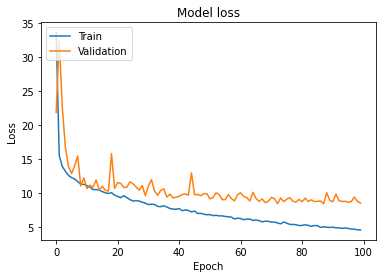

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

In [ ]:
df_cols = ['age', 'preag' , 'gen','act','abs']
new_df = pd.DataFrame(columns=df_cols)
def TestMAE(model,test_data,test_label,test_gender):
    test_gender = np.array(test_gender)
    test_gender = np.expand_dims(test_gender,axis=1)
    layer=K.function([model.layers[0].input,model.layers[11].input],[model.layers[-1].output])
    predictions=layer([test_data,test_gender])
    #print(predictions)
    predictions = np.array(predictions)
    #print(predictions)
    predictions = np.squeeze(predictions,axis=0)
    print (predictions.shape)
    x=(predictions-test_label)
    y=(np.abs(predictions-test_label))
    TestMAE = np.mean(np.abs(predictions-test_label))
    return TestMAE,predictions

tests_x=test_x[1200:1500]
tests_y=test_y[1200:1500]
tests_gen=test_gen[1200:1500]
val,pred=TestMAE(model,tests_x,tests_y,tests_gen)
print(val)

for i in range(300):
  new_row = {'age': tests_y[i], 'preag':pred[i][0], 'gen':tests_gen[i], 'act': tests_y[i]-pred[i][0], 'abs': np.abs( tests_y[i]-pred[i][0])}
  new_df= new_df.append(new_row, ignore_index=True)

(300, 1)
46.826344


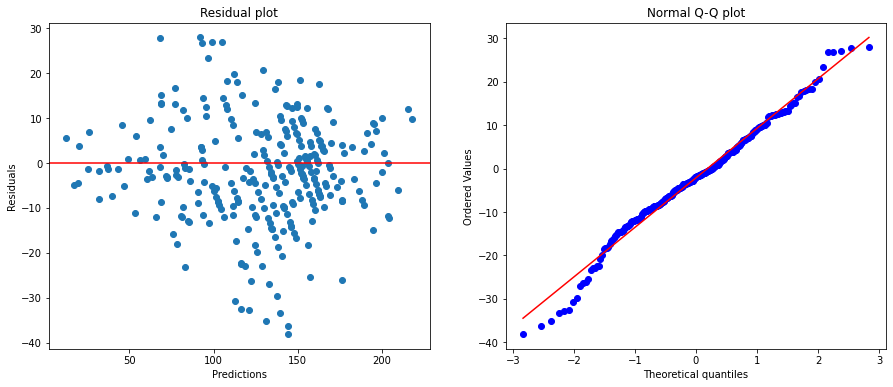

In [ ]:
from scipy import stats

def res_plots(df):
  res = df['act']
  plt.figure(figsize=(15,6))
  #df['preag'] = df['preag'].astype('int')
  # Residual plot
  plt.subplot(1, 2, 1)
  plt.scatter(df['preag'], res)
  plt.axhline(0, color='r')
  plt.title('Residual plot')
  plt.xlabel('Predictions')
  plt.ylabel('Residuals')

  # Normal Q-Q plot
  plt.subplot(1, 2, 2)
  stats.probplot(res, dist='norm', plot=plt)
  plt.title('Normal Q-Q plot')
  plt.show()

res_plots(new_df)

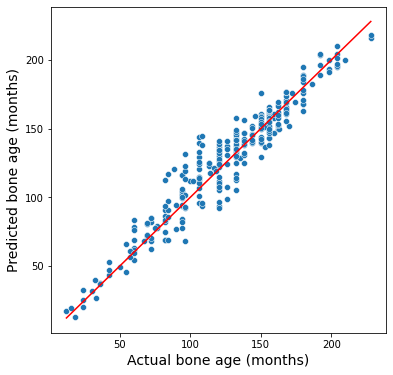

In [ ]:

from keras.metrics import mean_absolute_error
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns

def plot_preds(df, model_name):
  plt.figure(figsize=(6,6))
  sns.scatterplot(x='age', y='preag', data=df)
  sns.lineplot(x='age', y='age', data=df, color='red')
  # plt.title(model_name)
  plt.xlabel('Actual bone age (months)', fontsize=14)
  plt.ylabel('Predicted bone age (months)', fontsize=14)
  plt.show()

plot_preds(new_df, 'Different Scale CBAM with SE')

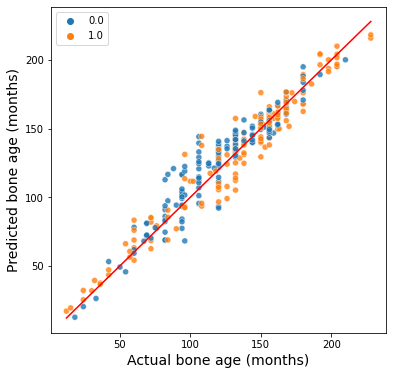

In [ ]:
def plot_preds_gender(df, model_name):
  plt.figure(figsize=(6,6))
  sns.scatterplot(x='age', y='preag', data=df, hue='gen', alpha=0.8)
  sns.lineplot(x='age', y='age', data=df, color='red')
  # plt.title(model_name)
  plt.xlabel('Actual bone age (months)', fontsize=14)
  plt.ylabel('Predicted bone age (months)', fontsize=14)
  plt.show()
plot_preds_gender(new_df, 'Different Scale CBAM with SE' )

/content/drive/MyDrive/boneage-training-dataset/1377.png


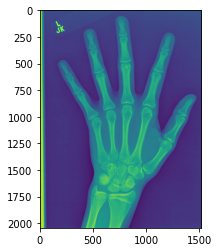

In [ ]:
import matplotlib.image as mpimg
import matplotlib.pyplot as plt



last_conv_layer_name = "batch_normalization_188"


for column in df['path']:
  print(column)
  img = mpimg.imread(column)
  plt.imshow(img)
  break


In [ ]:
def get_img_array(img_path, size):
    # `img` is a PIL image of size 299x299
    img = tf.keras.utils.load_img(img_path, target_size=size)
    # `array` is a float32 Numpy array of shape (299, 299, 3)
    array = tf.keras.utils.img_to_array(img)
    # We add a dimension to transform our array into a "batch"
    # of size (1, 299, 299, 3)
    array = np.expand_dims(array, axis=0)
    return array


def make_gradcam_heatmap(img_array, model, last_conv_layer_name, pred_index=None):
    # First, we create a model that maps the input image to the activations
    # of the last conv layer as well as the output predictions
    grad_model = tf.keras.models.Model(
        [model.layers[0].input,model.layers[11].input], [model.get_layer(last_conv_layer_name).output, model.output]
    )

    # Then, we compute the gradient of the top predicted class for our input image
    # with respect to the activations of the last conv layer
    with tf.GradientTape() as tape:
        last_conv_layer_output, preds = grad_model(img_array)
        if pred_index is None:
            pred_index = tf.argmax(preds[0])
        class_channel = preds[:, pred_index]


    # This is the gradient of the output neuron (top predicted or chosen)
    # with regard to the output feature map of the last conv layer
    grads = tape.gradient(class_channel, last_conv_layer_output)

    # This is a vector where each entry is the mean intensity of the gradient
    # over a specific feature map channel
    pooled_grads = tf.reduce_mean(grads, axis=(0, 1, 2))

    # We multiply each channel in the feature map array
    # by "how important this channel is" with regard to the top predicted class
    # then sum all the channels to obtain the heatmap class activation
    last_conv_layer_output = last_conv_layer_output[0]
    heatmap = last_conv_layer_output @ pooled_grads[..., tf.newaxis]
    heatmap = tf.squeeze(heatmap)

    # For visualization purpose, we will also normalize the heatmap between 0 & 1
    heatmap = tf.maximum(heatmap, 0) / tf.math.reduce_max(heatmap)
    return heatmap.numpy()

1/1 [==============================] - 0s 53ms/step


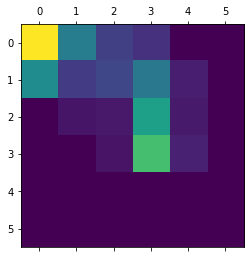

In [ ]:
import keras
import tensorflow as tf
preprocess_input = keras.applications.xception.preprocess_input
img_path="/content/drive/MyDrive/boneage-training-dataset/15598.png"
img_array = preprocess_input(get_img_array(img_path, size=IMG_SIZE))
last_conv_layer_name = "batch_normalization_188"
a=[0]
a=np.asarray(a)
x=[img_array,a]
# Print what the top predicted class is
preds = model.predict(x)
#print("Predicted:", decode_predictions(preds, top=1)[0])

# Generate class activation heatmap
heatmap = make_gradcam_heatmap(x, model, last_conv_layer_name)

# Display heatmap
plt.matshow(heatmap)
plt.show()
#heatmap.save("cam4117.jpg")

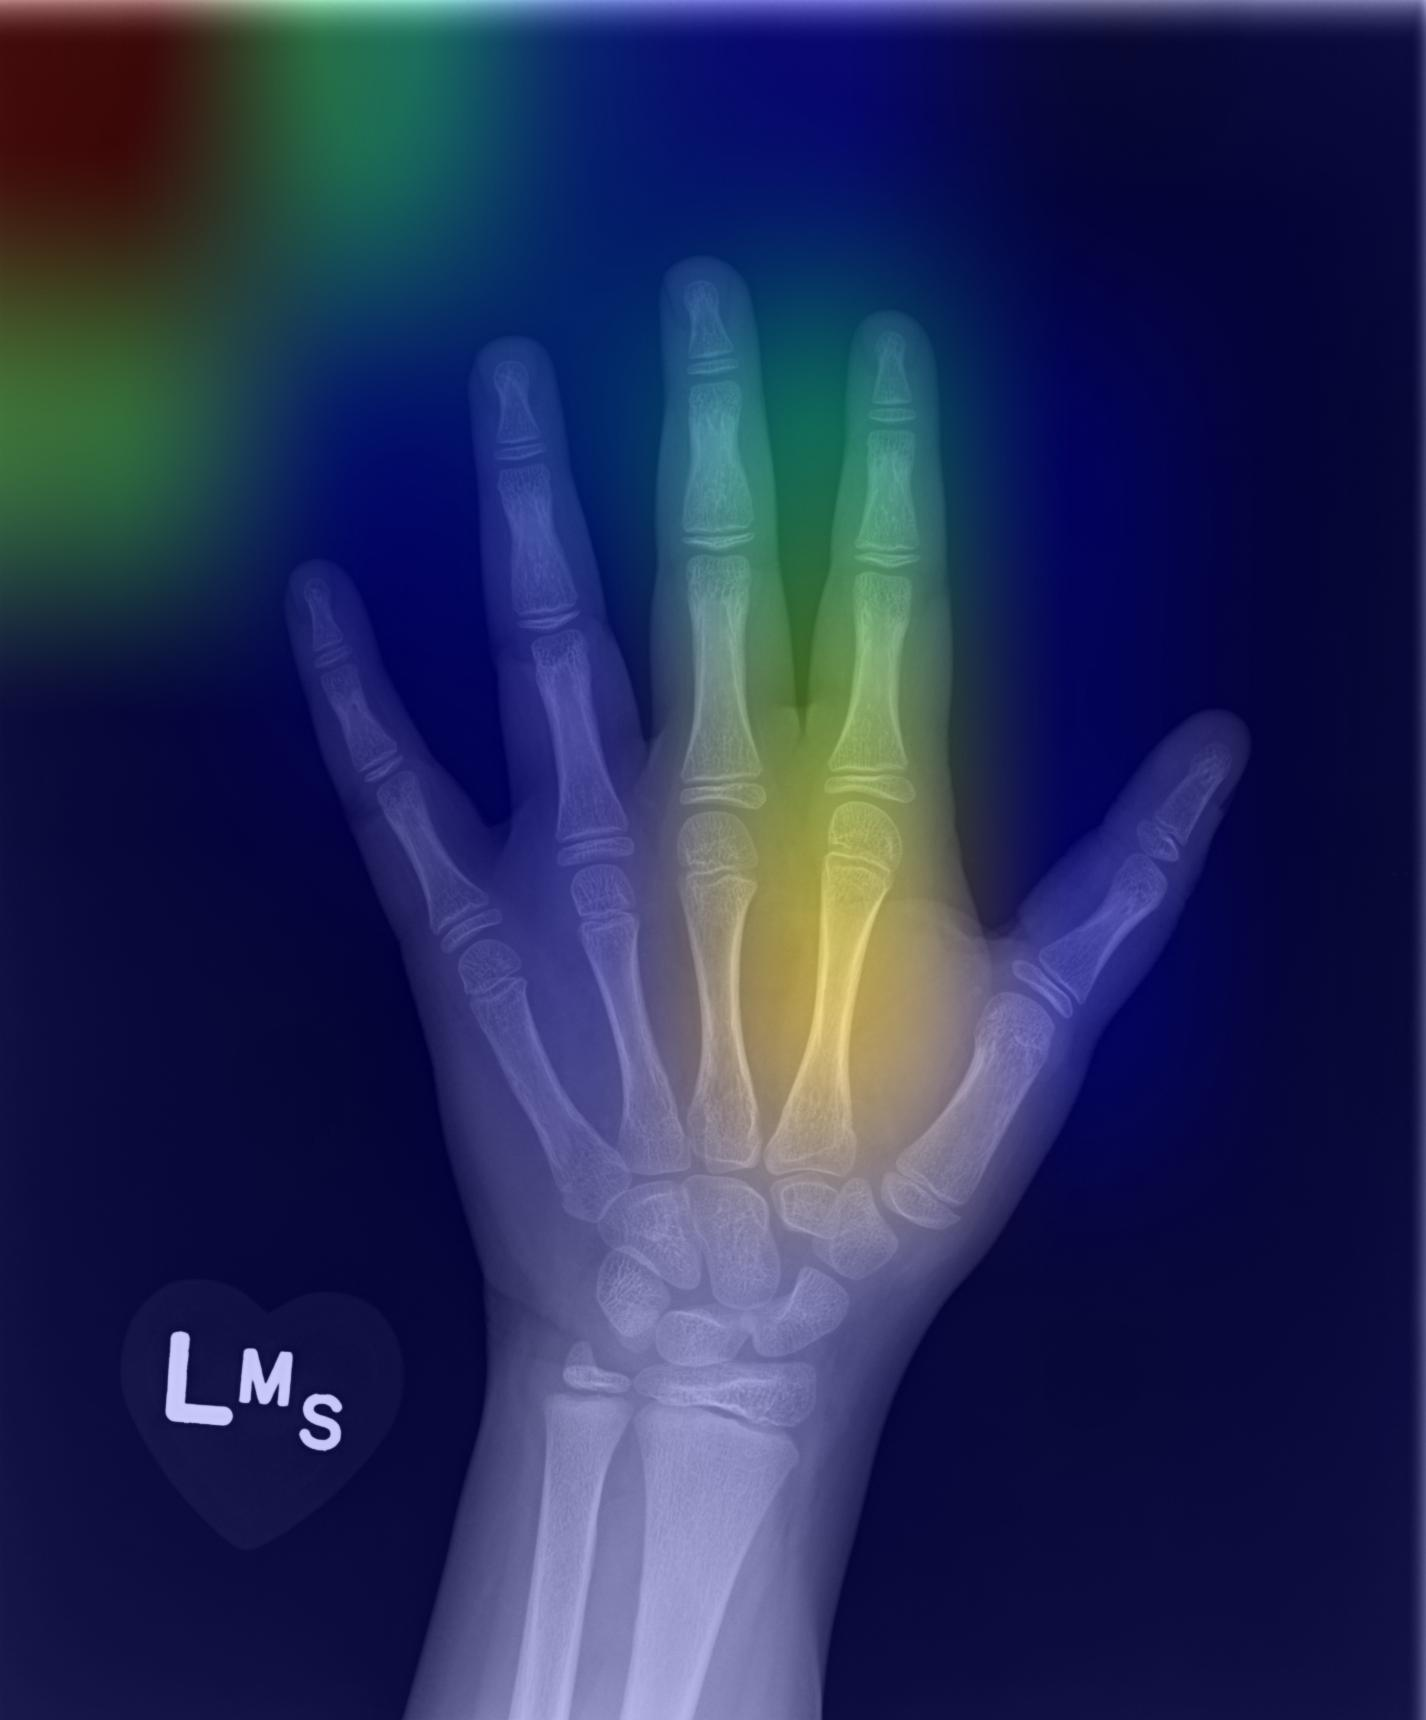

In [ ]:
from IPython.display import Image, display
import matplotlib.pyplot as plt
import matplotlib.cm as cm

def save_and_display_gradcam(img_path, heatmap, cam_path="cam15598.jpg", alpha=0.5):
    # Load the original image
    img = tf.keras.utils.load_img(img_path)
    img = tf.keras.utils.img_to_array(img)

    # Rescale heatmap to a range 0-255
    heatmap = np.uint8(255 * heatmap)

    # Use jet colormap to colorize heatmap
    jet = cm.get_cmap("jet")

    # Use RGB values of the colormap
    jet_colors = jet(np.arange(256))[:, :3]
    jet_heatmap = jet_colors[heatmap]

    # Create an image with RGB colorized heatmap
    jet_heatmap =tf.keras.preprocessing.image.array_to_img(jet_heatmap)
    jet_heatmap = jet_heatmap.resize((img.shape[1], img.shape[0]))
    jet_heatmap = tf.keras.utils.img_to_array(jet_heatmap)
   # print(jet_heatmap)
    # Superimpose the heatmap on original image
    superimposed_img = jet_heatmap * alpha + img
    superimposed_img =  tf.keras.utils.array_to_img(superimposed_img)

    # Save the superimposed image
    superimposed_img.save(cam_path)

    # Display Grad CAM
    display(Image(cam_path))
save_and_display_gradcam(img_path, heatmap)

Text(0.5, 1.0, 'Number of children in each age group')

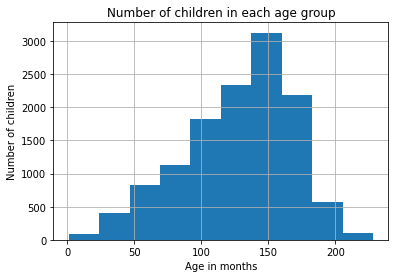

In [ ]:
df=pd.read_csv('/content/drive/MyDrive/boneage-training-dataset.csv')
 #plotting a histogram for bone ages
df['boneage'].hist()
plt.xlabel('Age in months')
plt.ylabel('Number of children')
plt.title('Number of children in each age group')

KeyboardInterrupt: ignored

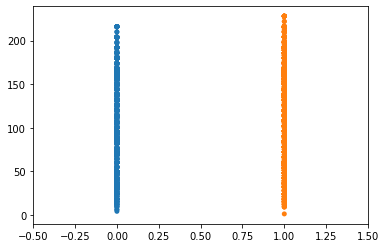

In [ ]:
import seaborn as sns
#Relationship between age and gender with a categorical scatter plot (swarmplot)
sns.swarmplot(x = df['male'], y = df['boneage'])

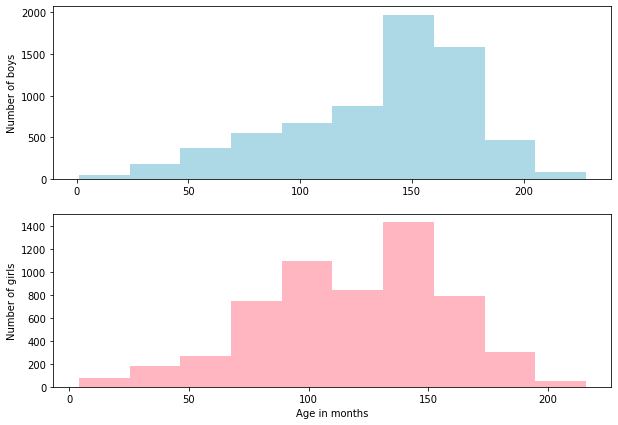

In [ ]:
#distribution of age within each gender 
male = df[df['male'] == True]
female = df[df['male'] == False]
fig, ax = plt.subplots(2,1)
ax[0].hist(male['boneage'], color = 'lightblue')
ax[0].set_ylabel('Number of boys')
ax[1].hist(female['boneage'], color = 'lightpink')
ax[1].set_xlabel('Age in months')
ax[1].set_ylabel('Number of girls')
fig.set_size_inches((10,7))

In [ ]:
base_model = InceptionV3(weights='imagenet', include_top=False)

input = Input(shape=(256,256,3),name='input1')
input_gender = Input(shape=(1,),dtype='float32',name='input2')
output = base_model(input)
gender_embedding=Dense(32)(input_gender)
#gender_embedding=Dense(12)(gender_embedding)
#x = keras.layers.MaxPooling2D(pool_size=(5,5))(output)
#x = keras.layers.Conv2D(512,kernel_size=(3,3))(x)
#x = conv2d_bn(output, 512, 3, 3, padding='valid') 
sq = keras.layers.GlobalAveragePooling2D()(output)
sq = keras.layers.Reshape((1,1,2048))(sq)
sq = keras.layers.Dense(units=2048, kernel_regularizer=regularizers.L2(0.1),activation="sigmoid")(sq)
block = keras.layers.multiply([output,sq])
#fine Squeeze and Excitation 1

net = keras.layers.add([output,block])
net = keras.layers.BatchNormalization()(net)
net = keras.layers.Activation("relu")(net)
net = keras.layers.MaxPooling2D(pool_size=(2, 2),name="block_1")(net)

print (K.int_shape(output))
x = keras.layers.MaxPooling2D(pool_size=(2,2))(net)
print (K.int_shape(x))
x=Flatten()(x)
f = keras.layers.Concatenate(axis=1)([x,gender_embedding])
print (K.int_shape(f)) 
#x = Dense(256, activation='relu')(x)
predictions = Dense(1)(f)
model = Model(inputs=[input,input_gender], outputs=predictions)
Adam=tf.keras.optimizers.Adam(lr=0.0001,beta_1=0.9,beta_2=0.999)
model.compile(optimizer=Adam, loss='mean_absolute_error', metrics=['MAE'])
model.summary()
from keras.preprocessing.image import ImageDataGenerator
DataGen = ImageDataGenerator(rotation_range=20,width_shift_range=0.15,height_shift_range=0.15,zoom_range=0.2,horizontal_flip=True)
def Generator(x_train,gender_train,y_train,batch_size):
    loopcount = len(y_train)//batch_size
    i=0
    while (True):
        if i>loopcount:
            i=0
        # i=np.random.randint(0,loopcount)
        x_train_batch = x_train[i*batch_size:(i+1)*batch_size,:,:,:]
        x_train_batch = DataAugment(x_train_batch)
        gender_train_batch = gender_train[i*batch_size:(i+1)*batch_size]
        y_train_batch = y_train[i*batch_size:(i+1)*batch_size]
        inputs = [x_train_batch,gender_train_batch]
        target = y_train_batch
        yield (inputs ,target)
        i = i+1
checkpoint =keras.callbacks.ModelCheckpoint(filepath='weights/weights.{epoch:02d}-{val_loss:.2f}.hdf5',save_weights_only=True,period=100)
history = model.fit_generator(DataGen.flow([train_x,train_gen],train_y,batch_size=64),steps_per_epoch=np.ceil(len(train_y)/64),epochs=100,verbose=1,validation_data=([valid_x,valid_gen],valid_y))
#history = model.fit_generator(Generator(x_train,gender_train,y_train,batch_size),steps_per_epoch=np.ceil(len(y_train)/batch_size),epochs=10,verbose=1,validation_data=([x_valid,gender_valid],y_valid))
#history=model.fit([x_train,gender_train],y_train,batch_size=32,epochs=5,verbose=1,validation_data=([x_valid,gender_valid],y_valid), callbacks = [checkpoint])
score = model.evaluate([test_x,test_gen], test_y, batch_size=64)

(None, 6, 6, 2048)
(None, 1, 1, 2048)
(None, 2080)
Model: "model_36"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input1 (InputLayer)            [(None, 256, 256, 3  0           []                               
                                )]                                                                
                                                                                                  
 inception_v3 (Functional)      (None, None, None,   21802784    ['input1[0][0]']                 
                                2048)                                                             
                                                                                                  
 global_average_pooling2d_1 (Gl  (None, 2048)        0           ['inception_v3[0][0]']           
 obalAveragePooling2D)                  

/usr/local/lib/python3.8/dist-packages/keras/optimizers/optimizer_v2/adam.py:110: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)
<ipython-input-157-b03c83fa4d17>:52: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = model.fit_generator(DataGen.flow([train_x,train_gen],train_y,batch_size=64),steps_per_epoch=np.ceil(len(train_y)/64),epochs=100,verbose=1,validation_data=([valid_x,valid_gen],valid_y))


Epoch 1/100
122/122 [==============================] - 125s 971ms/step - loss: 163.5903 - MAE: 33.4737 - val_loss: 99.9846 - val_MAE: 26.1283
Epoch 2/100
122/122 [==============================] - 111s 908ms/step - loss: 60.3462 - MAE: 15.4156 - val_loss: 38.1976 - val_MAE: 14.3344
Epoch 3/100
122/122 [==============================] - 112s 915ms/step - loss: 27.6135 - MAE: 13.8568 - val_loss: 21.4498 - val_MAE: 14.7397
Epoch 4/100
122/122 [==============================] - 110s 896ms/step - loss: 16.7543 - MAE: 13.1095 - val_loss: 21.7543 - val_MAE: 20.1442
Epoch 5/100
122/122 [==============================] - 112s 912ms/step - loss: 13.6515 - MAE: 12.8298 - val_loss: 14.5767 - val_MAE: 14.2502
Epoch 6/100
122/122 [==============================] - 108s 879ms/step - loss: 12.4129 - MAE: 12.2555 - val_loss: 12.2280 - val_MAE: 12.1706
Epoch 7/100
122/122 [==============================] - 111s 903ms/step - loss: 11.7815 - MAE: 11.7549 - val_loss: 15.4933 - val_MAE: 15.4835
Epoch 8/100


In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()